In [145]:
import pandas as pd
import seaborn as sns
# from google.colab import files
import io
import glob


In [150]:
# df_main_ar = [pd.read_csv(io.BytesIO(uploaded[d])) for d in uploaded]
path = r'./data' # use your path
all_files = glob.glob(path + "/*.csv")

li = {}
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    name = filename.split("/")[2][7:-4]
    # li[name] = (df)
    li.append(df)

AddressCount = pd.read_csv("./data/export-AddressCount.csv", index_col=None, header=0)
DAU = pd.read_csv("./data/export-DailyActiveEthAddress.csv", index_col=None, header=0)
MarCap = pd.read_csv("./data/export-MarketCap.csv", index_col=None, header=0)
NetHash = pd.read_csv("./data/export-NetworkHash.csv", index_col=None, header=0)
DailyTx = pd.read_csv("./data/export-TxGrowth.csv", index_col=None, header=0)
Fees = pd.read_csv("./data/export-TransactionFee.csv", index_col=None, header=0)
AVGFee = pd.read_csv("./data/export-AverageDailyTransactionFee.csv", index_col=None, header=0)

AddressCount = AddressCount.rename(columns={"Value":"AddressCount"})
NetHash = NetHash.rename(columns={"Value":"NetHash"})
DailyTx = DailyTx.rename(columns={"Value":"DailyTx"})
Fees = Fees.rename(columns={"Value":"Fees"})

DAU.drop('Date(UTC)',axis = 1, inplace = True)
AVGFee.drop('Date(UTC)',axis = 1, inplace = True)
AVGFee.drop('UnixTimeStamp',axis = 1, inplace = True)
AVGFee.drop('DateTime',axis = 1, inplace = True)

frame = pd.concat([AddressCount, DAU,MarCap, NetHash, DailyTx, AVGFee], axis=1)
# frame.rename(columns={frame.columns[3]:'Drop'}, inplace=True)
frame = frame.T.drop_duplicates().T

frame['Date(UTC)'] = frame['Date(UTC)'].apply(pd.to_datetime)
frame['newAddressCount'] = frame['AddressCount'].diff()

# frame.drop('Drop',axis = 1, inplace = True)
frame
# frame = pd.concat(li, axis=1)
# # frame
# frame = frame.T.drop_duplicates().T
# frame.drop(frame.columns[[7]], axis = 1, inplace = True)
# frame.rename(columns={frame.columns[[4]]:'DailyTx'}, inplace=True)
# # frame.AddressCount = 
# frame.AddressCount.rename(columns={frame.columns[6]:'AddressCount'})
# frame
# frame.TxGrowth.rename(columns={'Value':'DailyTx'}, inplace=True)
# frame[['MarketCap','AddressCount']]
# frame
# frame = pd.concat(li, axis=0, ignore_index=True)
# frame[10000:]
# [df_ad, df_day, df_mc, df_txg, tmp] = frame
# df_day

,Date(UTC),UnixTimeStamp,AddressCount,Unique Address Total Count,Unique Address Receive Count,Unique Address Sent Count,Supply,MarketCap,Price,NetHash,DailyTx,Average Txn Fee (USD),Average Txn Fee (Ether),newAddressCount
0,2015-07-30,1438214400.0,9205.0,8894.0,1.0,8893.0,72049306.59375,0.0,0.00,11.5297,8893.0,0.0,0,NaN
1,2015-07-31,1438300800.0,9361.0,0.0,0.0,0.0,72085498.3125,0.0,0.00,51.4594,0.0,0.0,0,156.0
2,2015-08-01,1438387200.0,9476.0,0.0,0.0,0.0,72113204.25,0.0,0.00,57.7845,0.0,0.0,0,115.0
3,2015-08-02,1438473600.0,9563.0,0.0,0.0,0.0,72141427.6875,0.0,0.00,67.9224,0.0,0.0,0,87.0
4,2015-08-03,1438560000.0,9639.0,0.0,0.0,0.0,72169404.40625,0.0,0.00,74.5737,0.0,0.0,0,76.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2502,2022-06-05,1654387200.0,197969044.0,392139.0,291812.0,220882.0,121064142.28125,218484.457575,"1,804.70",1067953.5223,1007109.0,9.34,0,66242.0
2503,2022-06-06,1654473600.0,198041515.0,428837.0,318763.0,239729.0,121076262.84375,225027.499071,"1,858.56",1039130.8261,1044319.0,8.89,0,72471.0
2504,2022-06-07,1654560000.0,198112575.0,417578.0,306494.0,237906.0,121088724.40625,219497.530731,"1,812.70",1069444.8123,1050984.0,9.61,0,71060.0
2505,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.6,0,NaN


In [151]:
frame

,Date(UTC),UnixTimeStamp,AddressCount,Unique Address Total Count,Unique Address Receive Count,Unique Address Sent Count,Supply,MarketCap,Price,NetHash,DailyTx,Average Txn Fee (USD),Average Txn Fee (Ether),newAddressCount
0,2015-07-30,1438214400.0,9205.0,8894.0,1.0,8893.0,72049306.59375,0.0,0.00,11.5297,8893.0,0.0,0,NaN
1,2015-07-31,1438300800.0,9361.0,0.0,0.0,0.0,72085498.3125,0.0,0.00,51.4594,0.0,0.0,0,156.0
2,2015-08-01,1438387200.0,9476.0,0.0,0.0,0.0,72113204.25,0.0,0.00,57.7845,0.0,0.0,0,115.0
3,2015-08-02,1438473600.0,9563.0,0.0,0.0,0.0,72141427.6875,0.0,0.00,67.9224,0.0,0.0,0,87.0
4,2015-08-03,1438560000.0,9639.0,0.0,0.0,0.0,72169404.40625,0.0,0.00,74.5737,0.0,0.0,0,76.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2502,2022-06-05,1654387200.0,197969044.0,392139.0,291812.0,220882.0,121064142.28125,218484.457575,"1,804.70",1067953.5223,1007109.0,9.34,0,66242.0
2503,2022-06-06,1654473600.0,198041515.0,428837.0,318763.0,239729.0,121076262.84375,225027.499071,"1,858.56",1039130.8261,1044319.0,8.89,0,72471.0
2504,2022-06-07,1654560000.0,198112575.0,417578.0,306494.0,237906.0,121088724.40625,219497.530731,"1,812.70",1069444.8123,1050984.0,9.61,0,71060.0
2505,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.6,0,NaN


In [156]:
print(frame['MarketCap'])
correlation = frame.corrwith(frame['MarketCap'])
print(correlation)

0                 0.0
1                 0.0
2                 0.0
3                 0.0
4                 0.0
            ...      
2502    218484.457575
2503    225027.499071
2504    219497.530731
2505              NaN
2506              NaN
Name: MarketCap, Length: 2507, dtype: object
Series([], dtype: float64)


In [138]:
frame['year'] = [d.year for d in frame['Date(UTC)']]
frame['month'] = [d.month for d in frame['Date(UTC)']]
frame['day'] = [d.day for d in frame['Date(UTC)']]
frame_by_m = frame[frame['day'] == 1][2:]
frame_by_m[20:22]
# frame_ = df_day_s['Unique Address Total Count'].diff().cumsum() / df_day_s['Unique Address Total Count'].iloc[0]
# df_day_s_n

# df_day.dtypes

,Date(UTC),UnixTimeStamp,AddressCount,Unique Address Total Count,Unique Address Receive Count,Unique Address Sent Count,Supply,MarketCap,Price,NetHash,DailyTx,Average Txn Fee (USD),Average Txn Fee (Ether),newAddressCount,year,month,day
672,2017-06-01,1496275200.0,2451291.0,95855.0,62824.0,77532.0,92129055.03125,20332.882445,220.70,37244.2449,199160.0,0.28,0,39010.0,2017.0,6.0,1.0
702,2017-07-01,1498867200.0,3877813.0,118460.0,72178.0,94550.0,92950626.75,24260.113582,261.00,62556.7775,240465.0,0.34,0,36006.0,2017.0,7.0,1.0


In [140]:
print(frame.corrwith(frame['MarketCap']))

AttributeError: 'float' object has no attribute 'shape'

<AxesSubplot:xlabel='Date(UTC)', ylabel='DailyTx'>

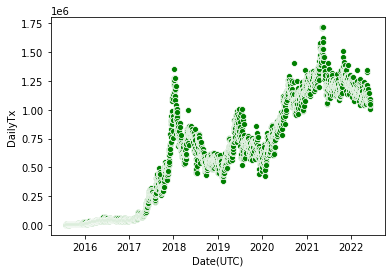

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(data = frame, x = "Date(UTC)", y = "DailyTx", color="g")

# ax2 = plt.twinx()
# sns.lineplot(data=df_day_s_n, color="b", ax=ax2)

<AxesSubplot:xlabel='Unique Address Total Count', ylabel='MarketCap'>

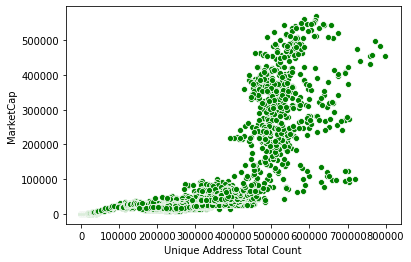

In [111]:
sns.scatterplot(data = frame, x = "Unique Address Total Count", y = "MarketCap", color="g")

<AxesSubplot:xlabel='newAddressCount', ylabel='MarketCap'>

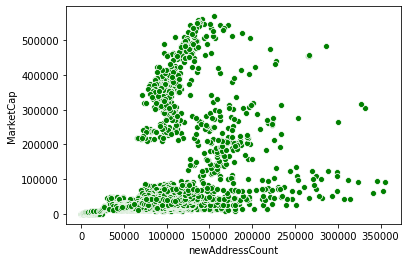

In [109]:
sns.scatterplot(data = frame, x = "newAddressCount", y = "MarketCap", color="g")

<AxesSubplot:xlabel='DailyTx', ylabel='MarketCap'>

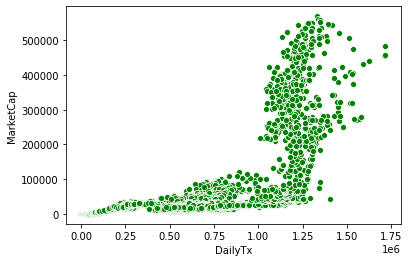

In [110]:
sns.scatterplot(data = frame, x = "DailyTx", y = "MarketCap", color="g")

In [55]:
df_mc['Date(UTC)'] = df_mc['Date(UTC)'].apply(pd.to_datetime)
df_mc['year'] = [d.year for d in df_mc['Date(UTC)']]
df_mc['month'] = [d.month for d in df_mc['Date(UTC)']]
df_mc['day'] = [d.day for d in df_mc['Date(UTC)']]
df_mc_s = df_mc[df_mc['day'] == 1]
df_mc_s = df_mc_s[2:]
df_mc_s_n = df_mc_s['MarketCap'].diff().cumsum() / df_mc_s['MarketCap'].iloc[0]
df_mc_s_n
# # df_day_s
# tmp
# df_day.dtypes

63              NaN
94         0.561279
124        0.307842
155        0.413497
186        2.334031
           ...     
2378    6647.222108
2406    7114.014628
2437    8288.221704
2467    6800.523192
2498    4387.731381
Name: MarketCap, Length: 81, dtype: float64

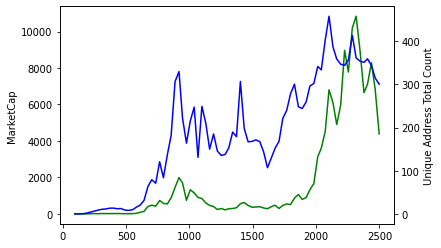

In [64]:
import matplotlib.pyplot as plt
sns.lineplot(data = df_mc_s_n, color="g")
ax2 = plt.twinx()
sns.lineplot(data=df_day_s_n, color="b", ax=ax2)

In [67]:
df_merged_day_mc_s_n = pd.concat([df_mc_s_n, df_day_s_n], axis = 1)

In [69]:
df_merged_day_mc_s_n['MarketCap'].corr(df_merged_day_mc_s_n['Unique Address Total Count'])

0.7502683877968985

In [75]:
df_day_s['squared_users'] = [d*(d-1)/2 for d in df_day_s['Unique Address Total Count']] 
# .diff().cumsum() / df_day_s['Unique Address Total Count'].iloc[0]

In [77]:
df_day_s_n_squ = df_day_s['squared_users'].diff().cumsum() / df_day_s['squared_users'].iloc[0]

In [78]:
df_day_s_n_squ 

63                NaN
94           1.092524
124          0.432355
155          1.544604
186          7.122598
            ...      
2378    123925.231756
2406    129704.825461
2437    118918.207560
2467     99532.088702
2498     90975.448494
Name: squared_users, Length: 81, dtype: float64

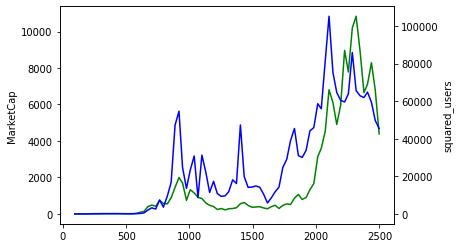

In [80]:
sns.lineplot(data = df_mc_s_n, color="g")
ax2 = plt.twinx()
sns.lineplot(data=df_day_s_n_squ/2, color="b", ax=ax2)

In [83]:
df_day_s_n_squ.corr(df_mc_s_n)

0.8375885631812113

In [2]:
df_day_s_n_squ

NameError: ignored